## Задание 1: Обработка изображений
### Используйте библиотеку "Pillow" или "opencv-python" для загрузки изображения в форматах jpg и png. Если загружен файл png, проверьте, содержит ли он прозрачные пиксели и если да, то сделайте такие пиксели белыми непрозрачными.

In [3]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 660.6 kB/s eta 0:00:59
   ---------------------------------------- 0.1/38.8 MB 660.6 kB/s eta 0:00:59
   ---------------------------------------- 0.1/38.8 MB 656.4 kB/s eta 0:01:00
   ---------------------------------------- 0.2/38.8 MB 845.5 kB/s eta 0:00:46
   ---------------------------------------- 0.3/38.8 MB 947.5 kB/s eta 0:00:41
   ---------------------------------------- 0.4/38.8 MB 998.3 kB/s eta 0:00:39
   ---------------------------------------- 0.4/38.8 MB 1.1 MB/s eta 0:00:37
    --------------------------------------- 0.5/38.8 MB 1.1 MB/s eta 0:00:37
    --------------------------------------- 0.6/38.8 MB 1.1 MB/s eta 0:00:35
    --------------------------------------- 0.7/38.8 MB 1.1 MB/s eta 0:00:35
    --------------------------------------- 0.7/38.8 MB 1.1 MB/s eta 0:00:35
    --------------------------------------- 0.8/38.8 MB 1.1 MB/s eta 0:

In [10]:
pip install matplotlib

     ---------------------------------------- 0.0/168.3 kB ? eta -:--:--
     -- ------------------------------------- 10.2/168.3 kB ? eta -:--:--
     --------- --------------------------- 41.0/168.3 kB 495.5 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/168.3 kB 819.2 kB/s eta 0:00:01
     ------------------------------ ----- 143.4/168.3 kB 778.5 kB/s eta 0:00:01
     ------------------------------------ 168.3/168.3 kB 845.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB 1.4 MB/s eta 0:00:06
   ---------------------------------------- 0.1/7.8 MB 1.2 MB/s eta 0:00:07
    --------------------------------------- 0.1/7.8 MB 1.0 MB/s eta 0:00:08
    --------------------------------------- 0.2/7.8 MB 1.1 MB/s eta 0:00:08
   - -------------------------------------- 0.2/7.8 MB 981.9 kB/s eta 0:00:08
   - -------------------------------------- 0.3/7.8 MB 983.0 kB/s eta 0:00:08
   -

In [27]:
import cv2
import numpy as np
# разделяем каналы и заменяем прозрачные пиксели на белые
img = cv2.imread('My_photo.png', cv2.IMREAD_UNCHANGED)
b, g, r, alpha = cv2.split(img)
white = np.ones_like(alpha) * 255
alpha_norm = alpha / 255.0
b = b * alpha_norm + white * (1 - alpha_norm)
g = g * alpha_norm + white * (1 - alpha_norm)
r = r * alpha_norm + white * (1 - alpha_norm)
img = cv2.merge((b, g, r)).astype(np.uint8)
cv2.imwrite('My_photo_1.png', img) # Сохраняем новое изображение

True

## Задание 2: Обработка изображений
### Реализуйте функции для изменения размера изображения, конвертации в черно-белое и применения фиьтра Гаусса (размытие).

(832, 1250, 4)
(416, 625, 4)


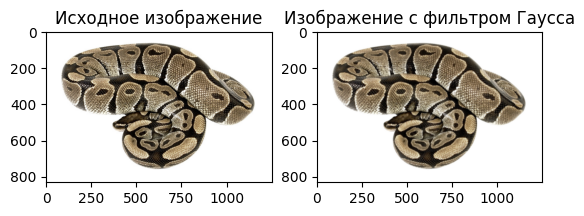

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('My_photo.png', cv2.IMREAD_UNCHANGED)
print(img.shape) # Смотрим размер

# Изменение изображения
scale_percent = 50 # процент на который изменяется размер изображения
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
new_size = (width, height) # желаемый размер изображения
new_img = cv2.resize(img, new_size) # Создаем новое изображение, изменяя размер
cv2.imwrite('My_photo_50.jpg', new_img) # Сохраняем новое изображение с измененными на 50% размерами
print(new_img.shape) # Смотрим результат

# Оттенки серого
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Преобразование изображения в оттенки серого
cv2.imwrite('My_photo_gray.jpg', gray_img) # Сохраняем новое изображение с оттенками серого

# Применение фильтра Гаусса

plt.subplot(1, 2, 1) 
plt.title("Исходное изображение") 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Вывод исходного изображения с учетом конвертации цветовых моделей
gaussian_img = cv2.GaussianBlur(image, (7, 7), 0) # применяем фильтр Гаусса
cv2.imwrite('My_photo_Gaussian.jpg', gaussian_img) # Сохраняем новое изображение с примененным фильтром
plt.subplot(1, 2, 2) 
plt.title("Изображение с фильтром Гаусса") 
plt.imshow(cv2.cvtColor(gaussian_img, cv2.COLOR_BGR2RGB))
plt.show()